# Data Analysis & Preprocessing

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

from sklearn.decomposition import PCA


from scipy.stats import f_oneway
import numpy as np

### Carga de dataset

In [3]:
def draw_histograms(df, variables, n_rows, n_cols):
    fig=plt.figure(figsize=(15, 8))
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins=50,ax=ax, facecolor='midnightblue', edgecolor='black')
        title_obj = ax.set_title(var_name+" Distribution")
        plt.setp(title_obj, color='black')                     # Individual title colours.

        # remove grid lines
        ax.grid(False)

        ax.xaxis.label.set_color('black')  
        ax.yaxis.label.set_color('black')          
        ax.tick_params(axis='x', colors='black')       #set the color of xticks
        ax.tick_params(axis='y', colors='black')       #set the color of yticks
        
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()

In [4]:
# Paso 1 - Creadondo data set de prueba
df = pd.read_csv("data/fact_application_full.csv")
df

,application_id,organization_id,provider_id,snapshot_date_id,applicationcode,fullresourcescount,devresourcescount,qaresourcescount,pdnresourcescount,fullaccountscount,...,yellowsecuritydensity,redfaulttolerancedensity,yellowfaulttolerancedensity,redperformancedensity,yellowperformancedensity,redcostoptimizingdensity,yellowcostoptimizingdensity,ppn_tm,pdnresourcessize,clasification
0,59,1,1,20231021,app00059,29,18,4,7,5,...,0.429,0.000,0.000,0.0,0.0,0.0,0.0,2023-10-21 01:04:53.696000,0.845,Red
1,625,1,1,20231021,app00625,28,24,1,3,4,...,0.333,0.000,0.333,0.0,0.0,0.0,0.0,2023-10-21 01:04:53.696000,0.477,Red
2,324,1,1,20231021,app00324,9,1,2,6,3,...,0.667,0.000,0.333,0.0,0.0,0.0,0.0,2023-10-21 01:04:53.696000,0.778,Red
3,736,1,1,20231021,app00736,6,3,0,3,3,...,0.333,0.000,0.000,0.0,0.0,0.0,0.0,2023-10-21 01:04:53.696000,0.477,Red
4,785,1,1,20231021,app00785,363,49,163,151,3,...,0.344,0.371,0.007,0.0,0.0,0.0,0.0,2023-10-21 01:04:53.696000,2.179,Red
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,548,1,1,20231021,app00548,12,12,0,0,1,...,0.000,0.000,0.000,0.0,0.0,0.0,0.0,2023-10-21 01:04:53.696000,NaN,NaN
908,583,1,1,20231021,app00583,9,9,0,0,1,...,0.000,0.000,0.000,0.0,0.0,0.0,0.0,2023-10-21 01:04:53.696000,NaN,NaN
909,317,1,1,20231021,app00317,10,10,0,0,2,...,0.000,0.000,0.000,0.0,0.0,0.0,0.0,2023-10-21 01:04:53.696000,NaN,NaN
910,155,1,1,20231021,app00155,20,20,0,0,1,...,0.000,0.000,0.000,0.0,0.0,0.0,0.0,2023-10-21 01:04:53.696000,NaN,NaN


In [5]:
df.describe()

,application_id,organization_id,provider_id,snapshot_date_id,fullresourcescount,devresourcescount,qaresourcescount,pdnresourcescount,fullaccountscount,devaccountscount,...,yellowcostoptimizingresourcescount,redsecuritydensity,yellowsecuritydensity,redfaulttolerancedensity,yellowfaulttolerancedensity,redperformancedensity,yellowperformancedensity,redcostoptimizingdensity,yellowcostoptimizingdensity,pdnresourcessize
count,912.000000,912.0,912.0,912.0,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,...,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,682.000000
mean,456.876096,1.0,1.0,20231021.0,263.184211,96.344298,70.880482,95.959430,6.389254,2.373904,...,0.121711,0.021755,0.069363,0.003935,0.034874,0.000020,0.004151,0.000014,0.000389,1.553886
std,263.906727,0.0,0.0,0.0,1254.604117,473.100976,355.346095,433.181744,22.494561,8.709326,...,1.373055,0.074807,0.125865,0.026768,0.082806,0.000424,0.016329,0.000370,0.003708,0.732243
min,1.000000,1.0,1.0,20231021.0,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,228.750000,1.0,1.0,20231021.0,9.000000,4.000000,0.000000,0.000000,2.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.079000
50%,456.500000,1.0,1.0,20231021.0,74.000000,27.500000,15.000000,22.500000,3.000000,1.000000,...,0.000000,0.000000,0.022500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.740000
75%,685.250000,1.0,1.0,20231021.0,221.000000,77.000000,55.000000,84.000000,4.000000,1.000000,...,0.000000,0.014250,0.078250,0.000000,0.039000,0.000000,0.000000,0.000000,0.000000,2.036000
max,914.000000,1.0,1.0,20231021.0,27149.000000,10403.000000,7377.000000,9369.000000,177.000000,70.000000,...,26.000000,1.000000,1.000000,0.500000,1.000000,0.010000,0.250000,0.011000,0.061000,3.972000


In [6]:
# Porcentaje de 0s de cada columna
(df == 0).sum()/len(df) * 100

application_id                         0.000000
organization_id                        0.000000
provider_id                            0.000000
snapshot_date_id                       0.000000
applicationcode                        0.000000
fullresourcescount                     0.000000
devresourcescount                      9.868421
qaresourcescount                      31.140351
pdnresourcescount                     25.219298
fullaccountscount                      0.000000
devaccountscount                       9.868421
qaaccountscount                       31.140351
pdnaccountscount                      25.219298
redsecuritycheckscount                64.254386
redsecurityresourcescount             64.254386
yellowsecuritycheckscount             39.692982
yellowsecurityresourcescount          39.692982
redfaulttolerancecheckscount          91.118421
redfaulttoleranceresourcescount       91.118421
yellowfaulttolerancecheckscount       50.109649
yellowfaulttoleranceresourcescount    50

In [7]:
df.dtypes

application_id                          int64
organization_id                         int64
provider_id                             int64
snapshot_date_id                        int64
applicationcode                        object
fullresourcescount                      int64
devresourcescount                       int64
qaresourcescount                        int64
pdnresourcescount                       int64
fullaccountscount                       int64
devaccountscount                        int64
qaaccountscount                         int64
pdnaccountscount                        int64
redsecuritycheckscount                  int64
redsecurityresourcescount               int64
yellowsecuritycheckscount               int64
yellowsecurityresourcescount            int64
redfaulttolerancecheckscount            int64
redfaulttoleranceresourcescount         int64
yellowfaulttolerancecheckscount         int64
yellowfaulttoleranceresourcescount      int64
redperformancecheckscount         

La variable `applicationcode` es un identificador de cada aplicación desplegada, se deja en el dataset dado que puede ser utilizada para explicar el modelo y dar interpretabilidad a los clusters generados.

In [22]:
# Se tiene el df con todos los campos disponibles --> 912 aplicaciones
# Seleccionamos solo las aplicaciones que tienen recursos en pdn
df_full_pdn = df[df['pdnresourcescount'] > 0]
len(df_full_pdn)

# Eliminamos las características asociadas a los conteos pues solo vamos a usar la característica con el log
features_a_eliminar = ['provider_id', 'snapshot_date_id',  'applicationcode',  'fullresourcescount',
                       'devresourcescount', 'qaresourcescount', 'pdnresourcescount', 'fullaccountscount',
                       'devaccountscount', 'qaaccountscount', 'pdnaccountscount', 'organization_id',
                       'ppn_tm', 'clasification'
                      ]
df_pdn = df_full_pdn.drop(features_a_eliminar, axis=1)


# Eliminamos application_id ya que es un identificador y no una característica que se deba incluir en el análisis
df_pdn = df_pdn.drop('application_id', axis=1)

features = df_pdn.columns.to_list()
len(features)

25

In [23]:
# normalicemos nuevamente los datos
minmax = MinMaxScaler()
df_pdn_scaled = minmax.fit_transform(df_pdn)

df_pdn_scaled = pd.DataFrame(df_pdn_scaled, columns=features)

In [24]:
df_pdn_scaled = df_pdn_scaled.filter(regex='^(?!.*density).*$')

In [25]:
df_pdn_scaled.columns

Index(['redsecuritycheckscount', 'redsecurityresourcescount',
       'yellowsecuritycheckscount', 'yellowsecurityresourcescount',
       'redfaulttolerancecheckscount', 'redfaulttoleranceresourcescount',
       'yellowfaulttolerancecheckscount', 'yellowfaulttoleranceresourcescount',
       'redperformancecheckscount', 'redperformanceresourcescount',
       'yellowperformancecheckscount', 'yellowperformanceresourcescount',
       'redcostoptimizingcheckscount', 'redcostoptimizingresourcescount',
       'yellowcostoptimizingcheckscount', 'yellowcostoptimizingresourcescount',
       'pdnresourcessize'],
      dtype='object')

In [26]:
# remove density features
features = features[:16] + features[-1:]

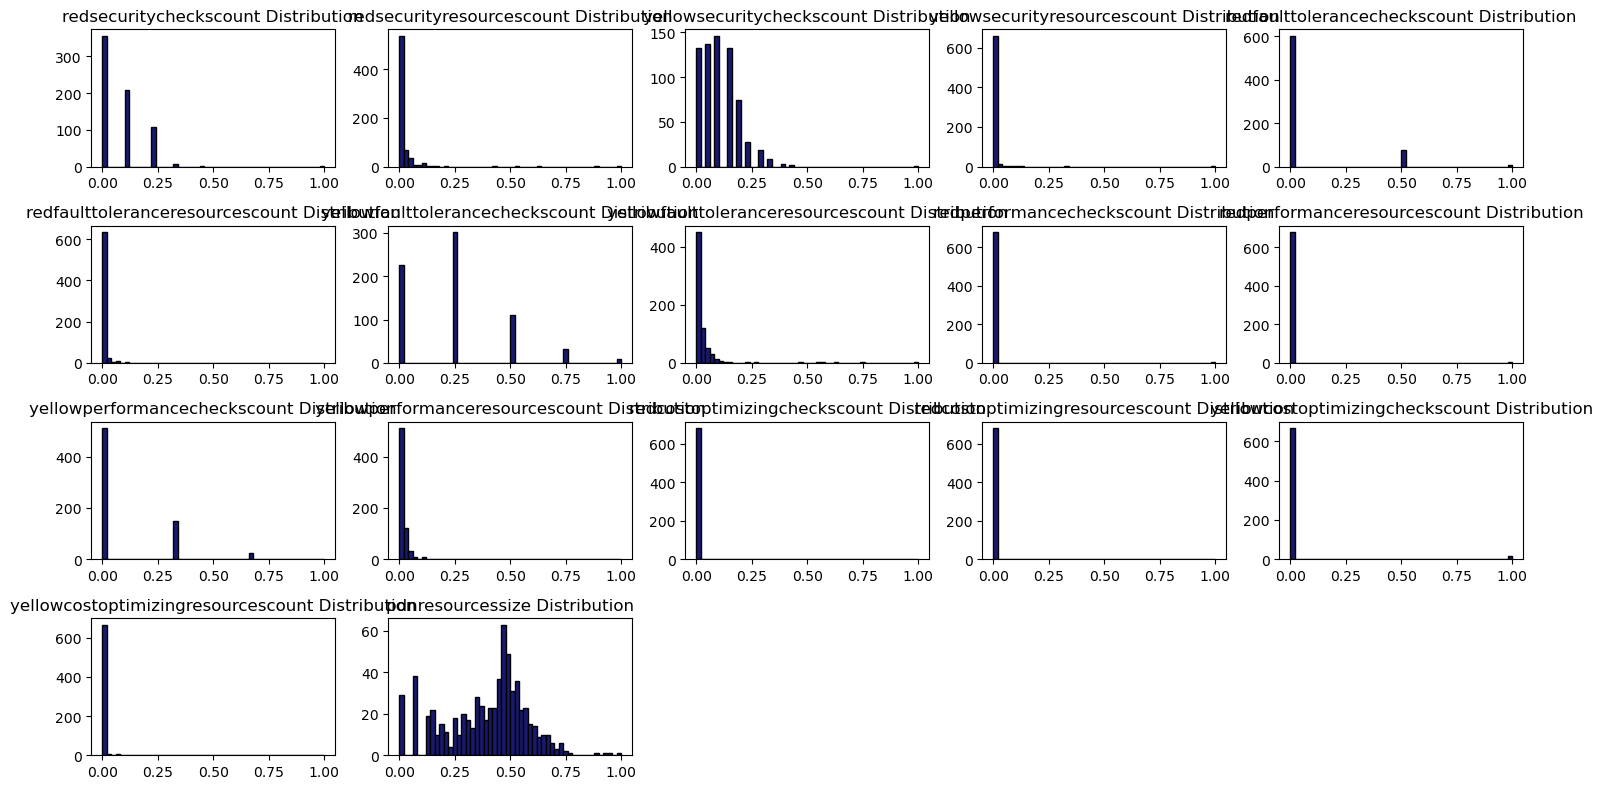

In [27]:
draw_histograms(df_pdn_scaled, features, 4, 5)

<Axes: >

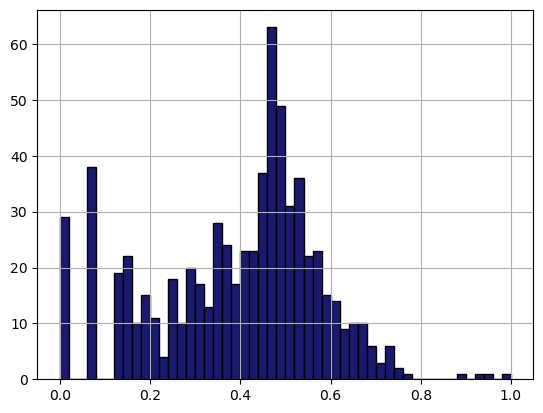

In [28]:
df_pdn_scaled['pdnresourcessize'].hist(bins=50, facecolor='midnightblue', edgecolor='black')

Al realizar el logaritmo a la variable pdnresourcessize se encuentra una mejor distribución, y esto permite que el modelo pueda tener información sobre la carga de trabajo que esta siendo analizada.


# Preprocesamiento de datos

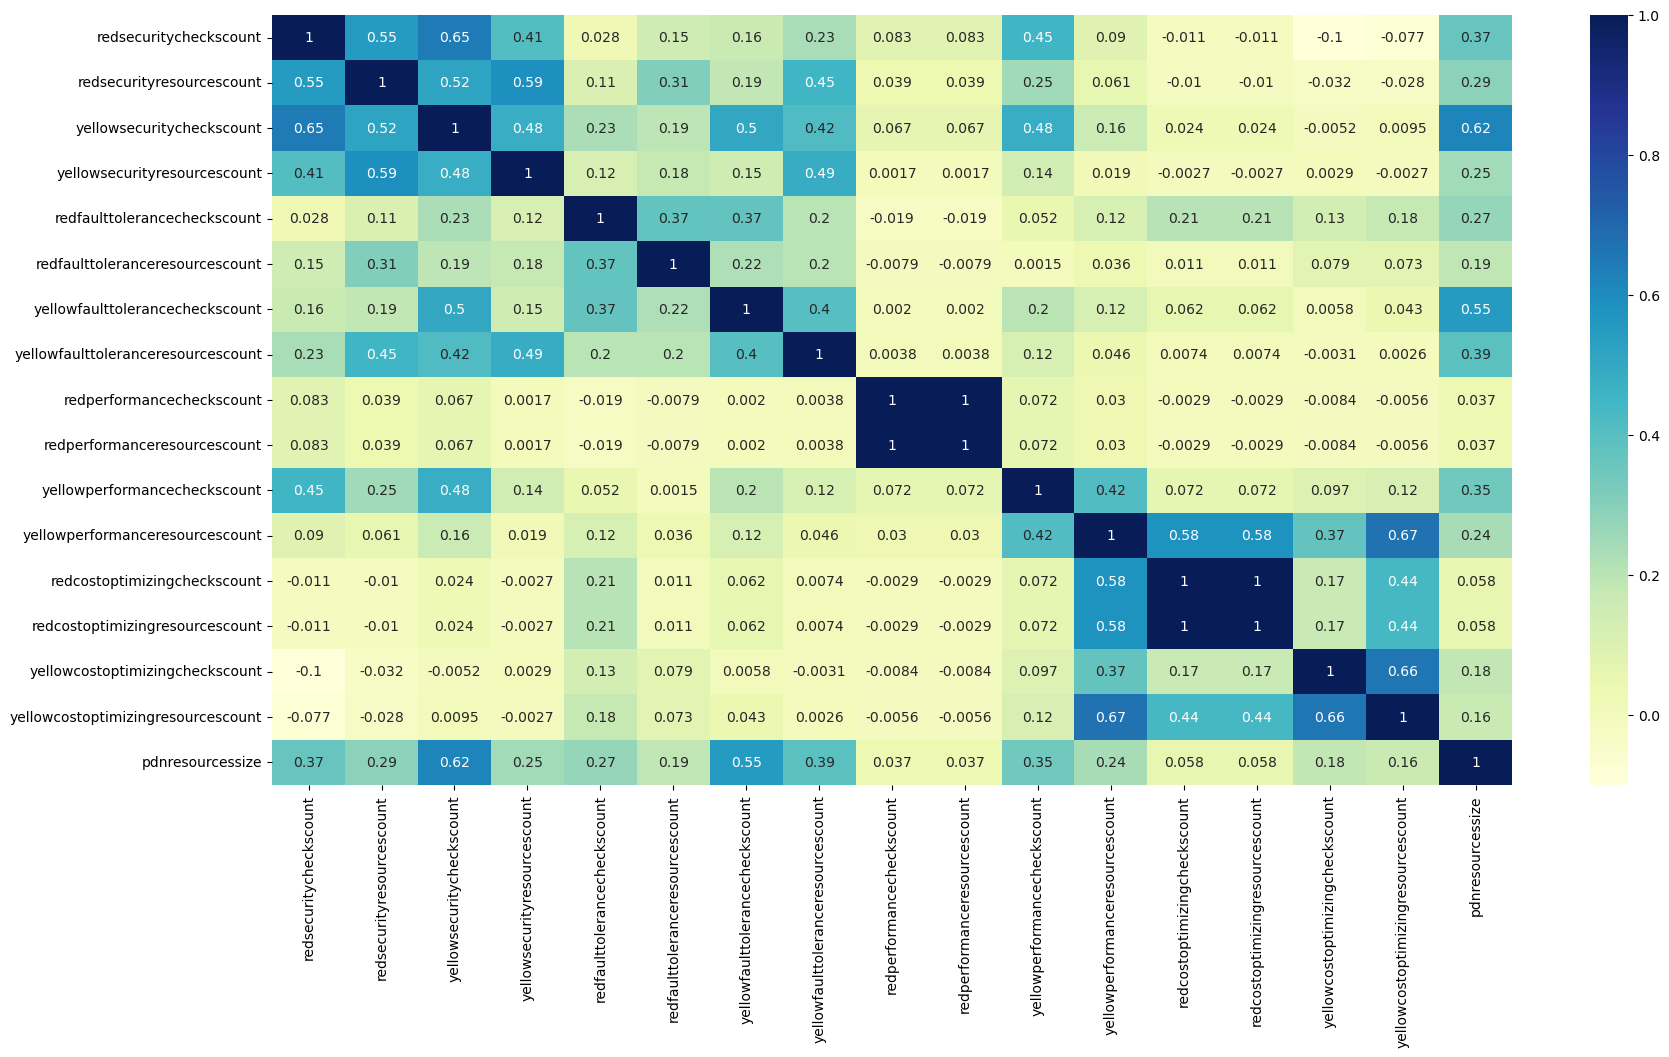

In [29]:
# heatmap of correlation
plt.figure(figsize=(20,10))
sns.heatmap(df_pdn_scaled[features].corr(), annot=True, cmap="YlGnBu")
plt.show()

Se encuentra correlacion entre la densidad de los checks amarillos y rojos en el pilar de seguridad (yellowsecuritydensity y redsecuritydensity), también en otras variables como la densidad de checks amarillos del pilar de tolerancia de fallos con la densidad de checks rojos en el pilar seguridad (yellowfaulttolerancedensity y redsecuritydensity). En general las correlaciones no son tan grandes como para indicar redundancia en las dimensiones. La variable pdnresourcessize no tiene mucha correlación con el resto de variables. Esto es bueno porque significa que puede aportar información al modelo.

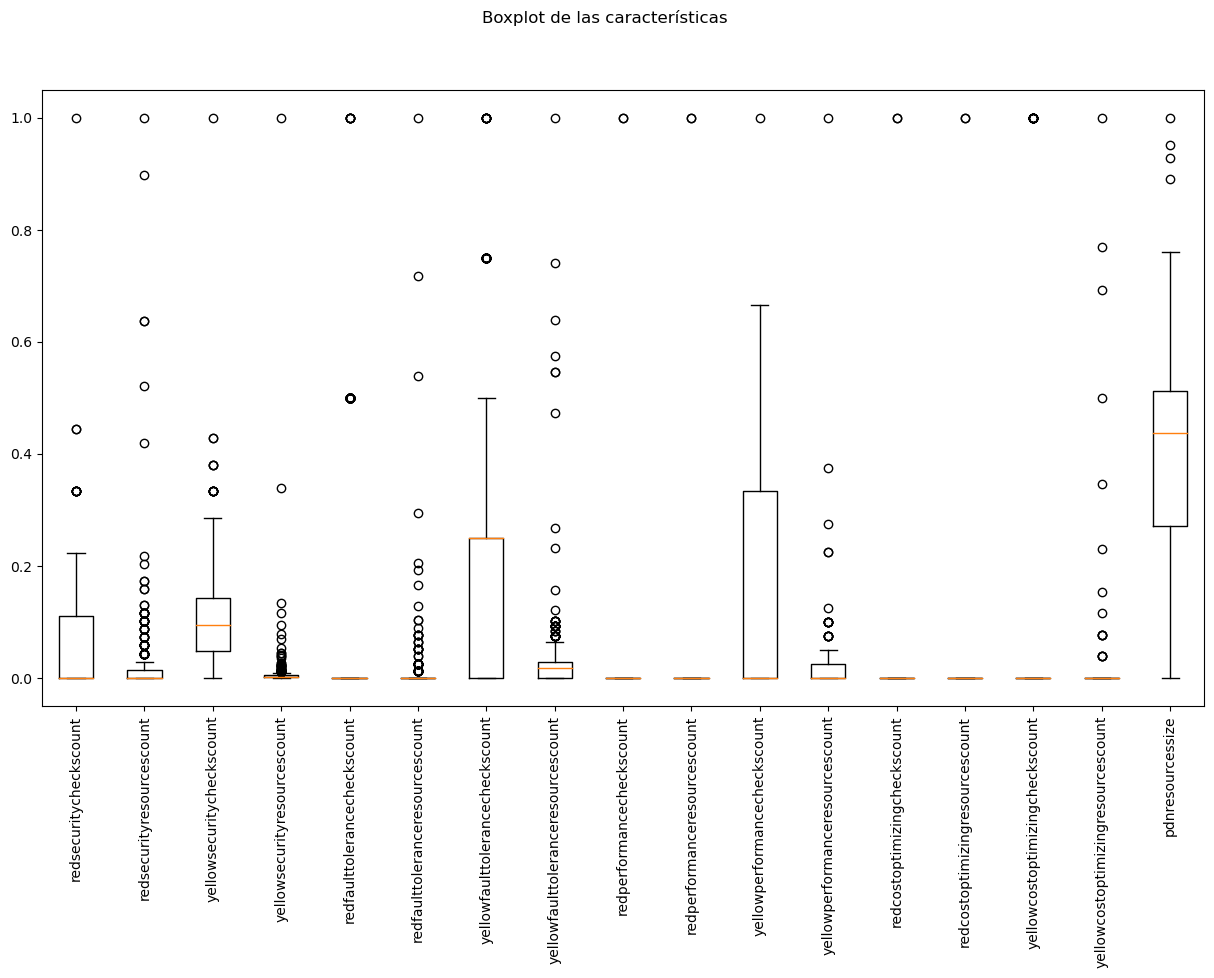

In [30]:
# boxplot for df0
fig = plt.figure(figsize=(15, 8))
fig.suptitle('Boxplot de las características')
ax = fig.add_subplot(111)
plt.boxplot(df_pdn_scaled[features])
ax.set_xticklabels(df_pdn_scaled[features].columns, rotation=90)
plt.show()

In [31]:
df_pdn_scaled.describe()

,redsecuritycheckscount,redsecurityresourcescount,yellowsecuritycheckscount,yellowsecurityresourcescount,redfaulttolerancecheckscount,redfaulttoleranceresourcescount,yellowfaulttolerancecheckscount,yellowfaulttoleranceresourcescount,redperformancecheckscount,redperformanceresourcescount,yellowperformancecheckscount,yellowperformanceresourcescount,redcostoptimizingcheckscount,redcostoptimizingresourcescount,yellowcostoptimizingcheckscount,yellowcostoptimizingresourcescount,pdnresourcessize
count,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000
mean,0.075432,0.020868,0.104175,0.006122,0.063783,0.008008,0.241569,0.027466,0.002933,0.002933,0.096774,0.011694,0.002933,0.002933,0.023460,0.006260,0.391210
std,0.095841,0.070930,0.089096,0.041431,0.179637,0.055277,0.224717,0.070427,0.054113,0.054113,0.178149,0.046891,0.054113,0.054113,0.151472,0.060999,0.184351
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.047619,0.000740,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.271652
50%,0.000000,0.000000,0.095238,0.002219,0.000000,0.000000,0.250000,0.018519,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.438066
75%,0.111111,0.014493,0.142857,0.004438,0.000000,0.000000,0.250000,0.027778,0.000000,0.000000,0.333333,0.025000,0.000000,0.000000,0.000000,0.000000,0.512588
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Selección de caracteristicas

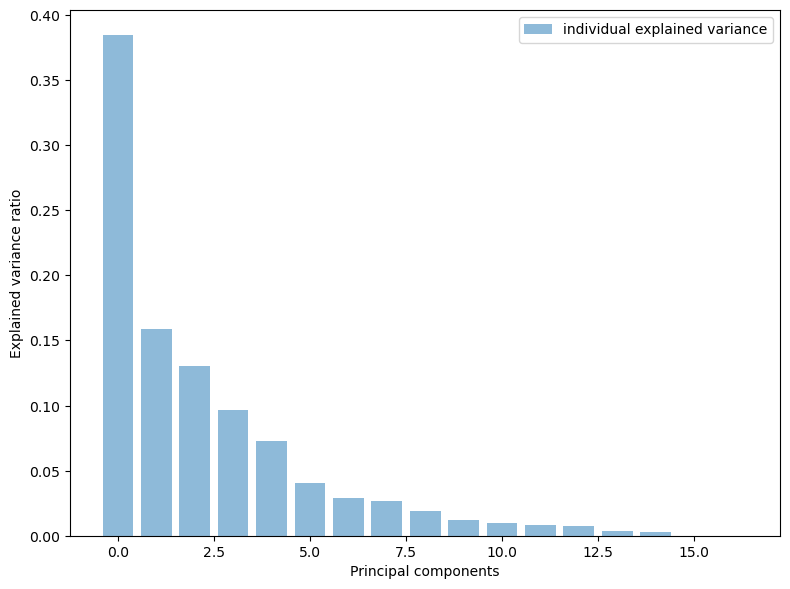

In [34]:
pca = PCA(n_components=df_pdn_scaled.shape[1])
principal_componets = pca.fit_transform(df_pdn_scaled)

variance_ratio = pca.explained_variance_ratio_

# plot the explained variance using a barplot
plt.figure(figsize=(8, 6))
plt.bar(range(df_pdn_scaled.shape[1]), variance_ratio, alpha=0.5, align='center', label='individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

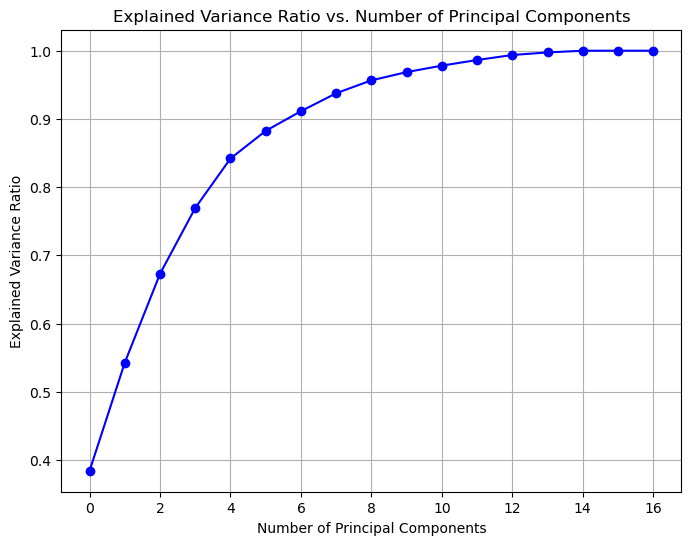

In [35]:
# plot pca
# Plot the explained variance ratio
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='-', color='b')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio vs. Number of Principal Components')
plt.grid(True)
plt.show()

In [36]:
Importancia_Componentes = pd.DataFrame(pca.explained_variance_ratio_)
Importancia_Componentes = Importancia_Componentes.T
print("Porcentaje de Varianza detectada para las primeras 1 componentes: ", format(100*Importancia_Componentes.loc[:,0:0].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 2 componentes: ", format(100*Importancia_Componentes.loc[:,0:1].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 3 componentes: ", format(100*Importancia_Componentes.loc[:,0:2].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 4 componentes: ", format(100*Importancia_Componentes.loc[:,0:3].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 5 componentes: ", format(100*Importancia_Componentes.loc[:,0:4].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 6 componentes: ", format(100*Importancia_Componentes.loc[:,0:5].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 7 componentes: ", format(100*Importancia_Componentes.loc[:,0:6].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 8 componentes: ", format(100*Importancia_Componentes.loc[:,0:7].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 9 componentes: ", format(100*Importancia_Componentes.loc[:,0:8].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 10 componentes: ", format(100*Importancia_Componentes.loc[:,0:9].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 11 componentes: ", format(100*Importancia_Componentes.loc[:,0:10].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 12 componentes: ", format(100*Importancia_Componentes.loc[:,0:11].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 13 componentes: ", format(100*Importancia_Componentes.loc[:,0:12].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 14 componentes: ", format(100*Importancia_Componentes.loc[:,0:13].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 15 componentes: ", format(100*Importancia_Componentes.loc[:,0:14].sum(axis = 1).values))

Porcentaje de Varianza detectada para las primeras 1 componentes:  [38.43169911]
Porcentaje de Varianza detectada para las primeras 2 componentes:  [54.28547141]
Porcentaje de Varianza detectada para las primeras 3 componentes:  [67.30375669]
Porcentaje de Varianza detectada para las primeras 4 componentes:  [76.95322841]
Porcentaje de Varianza detectada para las primeras 5 componentes:  [84.20492315]
Porcentaje de Varianza detectada para las primeras 6 componentes:  [88.25129828]
Porcentaje de Varianza detectada para las primeras 7 componentes:  [91.13530386]
Porcentaje de Varianza detectada para las primeras 8 componentes:  [93.76554049]
Porcentaje de Varianza detectada para las primeras 9 componentes:  [95.65686291]
Porcentaje de Varianza detectada para las primeras 10 componentes:  [96.86422987]
Porcentaje de Varianza detectada para las primeras 11 componentes:  [97.81448459]
Porcentaje de Varianza detectada para las primeras 12 componentes:  [98.63835783]
Porcentaje de Varianza de

Con la primera ejecución y el analísis de la curva de varianza explicada se puede ver que con 9 componentes principales se puede explicar el 95% de la varianza de los datos. Por lo tanto se decide utilizar 9 componentes principales para el modelo.

In [37]:
# aplicar pca con la varianza obtenida anteriormente
selected_components = 9 # 95%

explained_variance_rate = np.sum(pca.explained_variance_ratio_[0:selected_components])

final_pca = PCA(explained_variance_rate)

principal_componets = final_pca.fit_transform(df_pdn_scaled)

print(f"Tamaño de los datos originales: {df_pdn_scaled.shape}")
print(f"Tamaño de los datos reducidos: {principal_componets.shape}")
print(f"Porcentaje de varianza explicada con las componentes seleccionadas {explained_variance_rate:.2%}")

Tamaño de los datos originales: (682, 17)
Tamaño de los datos reducidos: (682, 9)
Porcentaje de varianza explicada con las componentes seleccionadas 95.66%


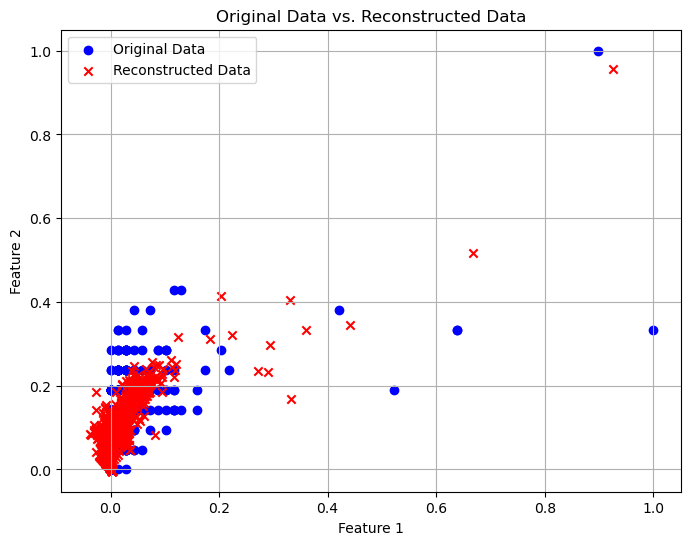

In [38]:
# reconstruction plot
reconstructed_data = final_pca.inverse_transform(principal_componets)

# Create a scatter plot of the original and reconstructed data
plt.figure(figsize=(8, 6))
plt.scatter(df_pdn_scaled.iloc[:, 1], df_pdn_scaled.iloc[:, 2], label='Original Data', marker='o', color='b')
plt.scatter(reconstructed_data[:, 1], reconstructed_data[:, 2], label='Reconstructed Data', marker='x', color='r')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Original Data vs. Reconstructed Data')
plt.legend()
plt.grid(True)
plt.show()

El gráfico de reconstrucción nos permite ver que el nuevo espacio de caracteristicas es capaz de representar los datos de manera similar al espacio original.

In [39]:
# convert array resulting of pca in dataframe with name of principal components
columns = [f"PC{i}" for i in range(1, principal_componets.shape[1] + 1)]
df_pca = pd.DataFrame(principal_componets, columns=columns)

array([[<Axes: xlabel='PC1', ylabel='PC1'>,
        <Axes: xlabel='PC2', ylabel='PC1'>,
        <Axes: xlabel='PC3', ylabel='PC1'>,
        <Axes: xlabel='PC4', ylabel='PC1'>,
        <Axes: xlabel='PC5', ylabel='PC1'>,
        <Axes: xlabel='PC6', ylabel='PC1'>,
        <Axes: xlabel='PC7', ylabel='PC1'>,
        <Axes: xlabel='PC8', ylabel='PC1'>,
        <Axes: xlabel='PC9', ylabel='PC1'>],
       [<Axes: xlabel='PC1', ylabel='PC2'>,
        <Axes: xlabel='PC2', ylabel='PC2'>,
        <Axes: xlabel='PC3', ylabel='PC2'>,
        <Axes: xlabel='PC4', ylabel='PC2'>,
        <Axes: xlabel='PC5', ylabel='PC2'>,
        <Axes: xlabel='PC6', ylabel='PC2'>,
        <Axes: xlabel='PC7', ylabel='PC2'>,
        <Axes: xlabel='PC8', ylabel='PC2'>,
        <Axes: xlabel='PC9', ylabel='PC2'>],
       [<Axes: xlabel='PC1', ylabel='PC3'>,
        <Axes: xlabel='PC2', ylabel='PC3'>,
        <Axes: xlabel='PC3', ylabel='PC3'>,
        <Axes: xlabel='PC4', ylabel='PC3'>,
        <Axes: xlabel='PC5', y

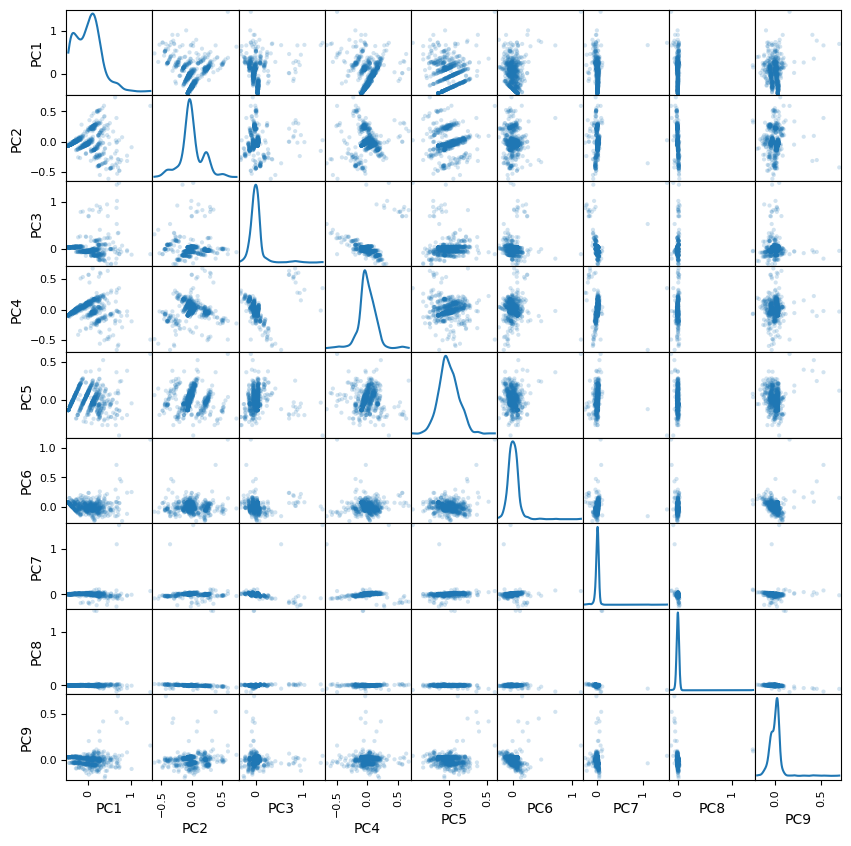

In [40]:
# plot scatter matrix using seaborn
scatter_matrix(df_pca, alpha=0.2, figsize=(10, 10), diagonal='kde')

In [41]:
# save file
df_pca.to_csv("data/fact_application_v3.csv", index=False)